Dependencies 

In [114]:
import pandas as pd
import numpy as np

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel



Data Display and Exploration

In [80]:
# Create a reference the CSV file desired
csv_path = "Resources/WDW_Rides.csv"

# Read the CSV into a Pandas DataFrame
rides_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
rides_df

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,...,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,...,Yes,Yes,32,1.50,6/30/18,"1,721.00",4.71,4 years 8 months 16 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,2/25/95,"10,247.00",28.05,28 years 0 months 20 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,...,Yes,Yes,44,5.00,5/27/17,"2,120.00",5.80,5 years 9 months 20 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,...,Yes,Yes,40,3.50,9/23/80,"15,515.00",42.48,42 years 5 months 23 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,4.00,10/7/98,"8,927.00",24.44,24 years 5 months 9 days,32.0,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",Yes,No,No,Yes,No,Yes,...,Yes,Yes,40,3.25,4/22/98,"9,095.00",24.90,24 years 10 months 24 days,24.0,4.0
6,Dumbo the Flying Elephant,MK,Fantasyland,"spinning, slow",No,Yes,Yes,No,No,No,...,Yes,Yes,0,1.50,10/1/71,"18,795.00",51.46,51 years 5 months 16 days,29.0,4.5
7,Expedition Everest,AK,Asia,"thrill, big drops, dark",Yes,No,No,No,Yes,Yes,...,Yes,Yes,44,2.75,4/7/06,"6,188.00",16.94,16 years 11 months 9 days,1.0,5.0
8,Frozen Ever After,EC,World Showcase,"slow, small drops, dark",No,No,Yes,Yes,No,Yes,...,Yes,Yes,0,5.00,6/21/16,"2,460.00",6.74,6 years 8 months 25 days,27.0,4.0
9,Gran Fiesta Tour Starring The Three Caballeros,EC,World Showcase,slow,No,No,Yes,No,No,No,...,Yes,Yes,0,8.00,4/2/07,"5,828.00",15.96,15 years 11 months 15 days,47.0,4.0


In [81]:
#count values in each column
rides_df.count()


Ride_name                    46
Park_location                46
Park_area                    46
Ride_type_all                46
Ride_type_thrill             46
Ride_type_spinning           46
Ride_type_slow               46
Ride_type_small_drops        46
Ride_type_big_drops          46
Ride_type_dark               46
Ride_type_scary              46
Ride_type_water              46
Fast_pass                    46
Classic                      46
Age_interest_all             46
Age_interest_preschoolers    46
Age_interest_kids            46
Age_interest_tweens          46
Age_interest_teens           46
Age_interest_adults          46
Height_req_inches            46
Ride_duration_min            46
Open_date                    46
Age_of_ride_days             46
Age_of_ride_years            46
Age_of_ride_total            46
TL_rank                      44
TA_Stars                     44
dtype: int64

In [82]:
#list of all rides
rides_list = rides_df["Ride_name"].value_counts()
rides_list


Alien Swirling Saucers                            1
The Barnstormer                                   1
Rock 'n' Roller Coaster                           1
Seven Dwarfs Mine Train                           1
Slinky Dog Dash                                   1
Soarin' Around the World                          1
Space Mountain                                    1
Spaceship Earth                                   1
Splash Mountain                                   1
Star Tours                                        1
Test Track                                        1
The Magic Carpets of Aladdin                      1
Astro Orbiter                                     1
The Many Adventures of Winnie the Pooh            1
The Twilight Zone Tower of Terror                 1
Tomorrowland Speedway                             1
Tomorrowland Transit Authority PeopleMover        1
Toy Story Mania                                   1
TriceraTop Spin                                   1
Under the Se

In [83]:
#how to print total sum of rides_counts? aka what is the total number of rides per park?

Ride Type Counts
    ~count all
    ~by park
    ~by type

In [84]:
#do this in Tableau and come back to try coding if time

Visualizations:
    ~Bar Graph:  Total Ride Count by Park
    ~Pie Charts: Ride Types by Park

In [85]:
#do this in Tableau and come back to try coding if time

Rides by Height:
    ~total count of rides within each height bucket
    ~rides by height per park

In [86]:
#do this in Tableau and come back to try coding if time

Ride Open Date
    ~Ride Names ordered by Open Date
    ~Visualization: timeline of ride names by open date

In [87]:
#do this in Tableau and come back to try coding if time

Data Cleaning
    ~remove fastpass column
    ~separate entries within ride_type_all and age_interest_all 
    ~one hot encoding to prepare for ML modeling
    ~display updated dataframe

In [88]:
#remove all columns not being used for ML models: age interest, park area, ride name, ride type all, fast pass, classic, open date, age of ride years/total columns
rides_df.drop(columns=['Park_area', 'Ride_name', 'Ride_type_all', 'Age_interest_all', 'Age_interest_kids','Age_interest_tweens', 'Age_interest_preschoolers', 'Age_interest_teens', 'Age_interest_adults', 'Fast_pass', 'Classic', 'Open_date', 'Age_of_ride_years', 'Age_of_ride_total'], axis=1, inplace=True)

#convert nan values to 0 (TA_Stars column)
cleaned_rides_df = rides_df.fillna(0)

#display new dataframe
cleaned_rides_df

,Park_location,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Height_req_inches,Ride_duration_min,Age_of_ride_days,TL_rank,TA_Stars
0,HS,No,Yes,No,No,No,No,No,No,32,1.50,"1,721.00",31.0,0.0
1,MK,No,Yes,Yes,No,No,No,No,No,0,1.50,"10,247.00",43.0,3.5
2,AK,Yes,No,No,No,No,No,No,No,44,5.00,"2,120.00",9.0,5.0
3,MK,Yes,No,No,Yes,No,No,No,No,40,3.50,"15,515.00",8.0,4.5
4,MK,No,Yes,Yes,No,No,No,No,No,0,4.00,"8,927.00",32.0,4.5
5,AK,Yes,No,No,Yes,No,Yes,Yes,No,40,3.25,"9,095.00",24.0,4.0
6,MK,No,Yes,Yes,No,No,No,No,No,0,1.50,"18,795.00",29.0,4.5
7,AK,Yes,No,No,No,Yes,Yes,No,No,44,2.75,"6,188.00",1.0,5.0
8,EC,No,No,Yes,Yes,No,Yes,No,No,0,5.00,"2,460.00",27.0,4.0
9,EC,No,No,Yes,No,No,No,No,No,0,8.00,"5,828.00",47.0,4.0


In [89]:
# #delete index column
# # HOW DO I DO THIS?
# #cleaned_rides_df.drop(cleaned_rides_df.columns[0], axis=1)
#cleaned_WDW_df = cleaned_rides_df.drop(cleaned_rides_df.loc[cleaned_rides_df.index==id].index)
#cleaned_WDW_df

Preparing data for ML

In [90]:
#do all columns need to be changed to 0 or 1?





In [91]:
#one hot encoding for categorical features

cleaned_rides_df = pd.get_dummies(cleaned_rides_df)


Supervised ML: Logistic Regression

In [92]:
#ride count at MK?
#what is 0 and 1?

cleaned_rides_df['Park_location_MK'].value_counts()


0    23
1    23
Name: Park_location_MK, dtype: int64

In [93]:
cleaned_rides_df['Park_location_EC'].value_counts()

0    38
1     8
Name: Park_location_EC, dtype: int64

In [94]:
cleaned_rides_df['Park_location_HS'].value_counts()

0    40
1     6
Name: Park_location_HS, dtype: int64

In [95]:
cleaned_rides_df['Park_location_AK'].value_counts()

0    37
1     9
Name: Park_location_AK, dtype: int64

In [96]:
#a look at the df columns
#what is going on with ag of ride days?
cleaned_rides_df.columns

Index(['Height_req_inches', 'Ride_duration_min', 'TL_rank', 'TA_Stars',
       'Park_location_AK', 'Park_location_EC', 'Park_location_HS',
       'Park_location_MK', 'Ride_type_thrill_No', 'Ride_type_thrill_Yes',
       'Ride_type_spinning_No', 'Ride_type_spinning_Yes', 'Ride_type_slow_No',
       'Ride_type_slow_Yes', 'Ride_type_small_drops_No',
       'Ride_type_small_drops_Yes', 'Ride_type_big_drops_No',
       'Ride_type_big_drops_Yes', 'Ride_type_dark_No', 'Ride_type_dark_Yes',
       'Ride_type_scary_No', 'Ride_type_scary_Yes', 'Ride_type_water_No',
       'Ride_type_water_Yes', 'Age_of_ride_days_1,721.00',
       'Age_of_ride_days_10,247.00', 'Age_of_ride_days_10,465.00',
       'Age_of_ride_days_11,200.00', 'Age_of_ride_days_12,145.00',
       'Age_of_ride_days_14,777.00', 'Age_of_ride_days_15,515.00',
       'Age_of_ride_days_17,426.00', 'Age_of_ride_days_17,593.00',
       'Age_of_ride_days_17,987.00', 'Age_of_ride_days_18,795.00',
       'Age_of_ride_days_2,120.00', 'Age_of_

In [97]:
#Is there a way to use age of ride days or park location as Y?

#assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values so we use reshape() to create this

X = cleaned_rides_df[['Park_location_AK', 'Park_location_EC', 'Park_location_HS',
       'Park_location_MK','Height_req_inches','Ride_duration_min', 'TL_rank', 'TA_Stars',
       'Ride_type_thrill_No', 'Ride_type_thrill_Yes',
       'Ride_type_spinning_No', 'Ride_type_spinning_Yes', 'Ride_type_slow_No',
       'Ride_type_slow_Yes', 'Ride_type_small_drops_No',
       'Ride_type_small_drops_Yes', 'Ride_type_big_drops_No',
       'Ride_type_big_drops_Yes', 'Ride_type_dark_No', 'Ride_type_dark_Yes',
       'Ride_type_scary_No', 'Ride_type_scary_Yes', 'Ride_type_water_No',
       'Ride_type_water_Yes', 'Age_of_ride_days_1,721.00','Age_of_ride_days_10,247.00', 'Age_of_ride_days_10,465.00',
       'Age_of_ride_days_11,200.00', 'Age_of_ride_days_12,145.00',
       'Age_of_ride_days_14,777.00', 'Age_of_ride_days_15,515.00',
       'Age_of_ride_days_17,426.00', 'Age_of_ride_days_17,593.00',
       'Age_of_ride_days_17,987.00', 'Age_of_ride_days_18,795.00',
       'Age_of_ride_days_2,120.00', 'Age_of_ride_days_2,460.00',
       'Age_of_ride_days_3,215.00', 'Age_of_ride_days_3,753.00',
       'Age_of_ride_days_5,403.00', 'Age_of_ride_days_5,828.00',
       'Age_of_ride_days_6,188.00', 'Age_of_ride_days_6,525.00',
       'Age_of_ride_days_7,107.00', 'Age_of_ride_days_7,594.00',
       'Age_of_ride_days_7,638.00', 'Age_of_ride_days_7,656.00',
       'Age_of_ride_days_7,968.00', 'Age_of_ride_days_8,632.00',
       'Age_of_ride_days_8,686.00', 'Age_of_ride_days_8,767.00',
       'Age_of_ride_days_8,796.00', 'Age_of_ride_days_8,927.00',
       'Age_of_ride_days_9,095.00', 'Age_of_ride_days_9,663.00']]
y = cleaned_rides_df['Height_req_inches']

print("Shape: ", X.shape, y.shape)

Shape:  (46, 55) (46,)


In [98]:

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.75


/Users/kristinamulholland/opt/anaconda3/envs/pythondata/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
#why is this model less accurate than the previous one?

clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.68


In [115]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
       False, False,  True,  True, False])

In [116]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [117]:
#why are the scores different in this model?

clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.96
Testing Score: 0.8


In [105]:
#display feature importance of logistic regression:  attempting to show either a labelled matrix or bar graph

# model = LogisticRegression()
# # model.fit(...)

# my_dict = dict(zip(model.named_steps.tfidf.get_feature_names(), model.named_steps.classifier.coef_.T))
# coefs = pd.DataFrame.from_dict(my_dict, orient='index')
# coefs.columns = model.named_steps.classifier.classes_

# for category in coefs.columns:
#     vals = list(coefs[category].nlargest(10).values) + list(
#         coefs[category].nsmallest(5).sort_values(ascending=False).values)

#     names = list(coefs[category].nlargest(10).index) + list(
#         coefs[category].nsmallest(5).sort_values(ascending=False).index)

#     colors = ['blue' if x > 0 else 'red' for x in vals]

#     # plot
#     vals.reverse()
#     names.reverse()
#     fig = plt.figure(figsize=(15, 10))
#     pos = np.arange(len(vals)) + .5
#     plt.barh(pos, vals, align='center', color=colors)
#     plt.yticks(pos, names)
#     title = f'Local explanation for class {category}'
#     plt.title(title)
#     plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'named_steps'

Supervised ML: Random Forest

In [108]:
# Create data
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


[0.01957363 0.11588155 0.02671949 0.01235642 0.01770372 0.07453437
 0.01405267 0.01413583 0.01892128 0.01074294 0.01628946 0.01645848
 0.018682   0.01699861 0.0176364  0.01301255 0.01570845 0.01371403
 0.01050295 0.01107723 0.0105415  0.02810453 0.01104434 0.01291979
 0.01172246 0.01594598 0.01161194 0.01284583 0.04016023 0.02011063
 0.01166108 0.01283269 0.02629694 0.01630979 0.01528582 0.00800544
 0.01696003 0.01449151 0.0469682  0.01637734 0.01806633 0.01411943
 0.01714387 0.01517432 0.04015419 0.01210507 0.008706   0.01281879
 0.01460335 0.01221054]


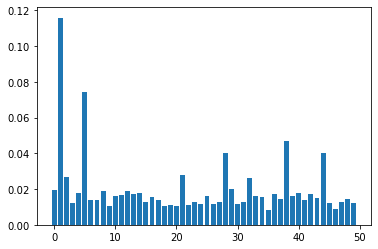

In [110]:
#what is this showing?
#is there a way to label feature from data column names?

features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()